# Final Exam Project


You are interviewing for your first Data Analyst job at MegaCORP. They want to test your basic skills with python before the give you the offer.
The first step is to run the code below to generate a data set for analysis but before you do that they want you to change some of the code to accomplish the following:
- The data set should include 7500 values
- Add yourself (your first name) as a salesperson in the North region
- Change Smartphone to Apple Iphone with possible prices between 400 and 1400
- Add a new product: Android Smartphone with possible prices between 200 and 1200
- Output a CSV file named MegaCORP_2022_sales_data.csv


In [17]:
# Modify and run this code to create df dataframe
import pandas as pd
import numpy as np
import random
from random import randint
from datetime import datetime, timedelta

# Set constants
N = 7500
product_price_map = {'Laptop': (500.00, 1500.00), 'Appleiphone': (400.00, 1400.00), 'Television': (200.00, 2000.00), 'AndroidSmartphone': (200.00, 1200.00)}
region_salesperson_map = {
    'North': ['Hamlet', 'Ophelia','Jacques'],
    'South': ['Polonius', 'Horatio'],
    'East': ['Gertrude', 'Jerry'],
    'West': ['George', 'Elaine']
}

# Function to generate random dates
def random_dates(start, end, n=10):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2022-01-01')
end = pd.to_datetime('2022-12-31')

# Generate random data
regions = list(region_salesperson_map.keys())
products = list(product_price_map.keys())
data = {
    'Date': random_dates(start, end, N),
    'Region': [random.choice(regions) for _ in range(N)],
    'SalesPerson': [],
    'Product': [random.choice(products) for _ in range(N)],
    'UnitsSold': [randint(1, 20) for _ in range(N)],  # random number between 1 and 20
    'UnitPrice': []
}

# Assign salespeople based on region
for region in data['Region']:
    data['SalesPerson'].append(random.choice(region_salesperson_map[region]))

# Assign unit price based on product
for product in data['Product']:
    min_price, max_price = product_price_map[product]
    data['UnitPrice'].append(round(random.uniform(min_price, max_price), 2))

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('MegaCORP_2022_sales_data.csv', index=False)


Add two columns to our dataframe df
- Sales which is the UnitsSold * UnitPrice
- Sales_Commission which is 1.5% of Sales upto 10000 and 2.25 on any amount over 10000
For example, if Hamlet had a sale of 20 units at a price of 1100 his Sales would be 22000 and his commission would be calculated 1.5% * 10000 + 2.25% * (22000-10000) for a total of $420
- Use round() to make sure the commission has only 2 digit precision (ie, 34.55 not 34.559340)

In [23]:
# Create 'Sales' column which is UnitsSold * UnitPrice

df['Sales'] = df['UnitsSold'] * df['UnitPrice']

In [24]:
# Create 'Sales_Commission' column with 2 digits of precision
# Calculate Sales_Commission
def calculate_commission(row):
    if row['Sales'] <= 10000:
        return 0.015 * row['Sales']
    else:
        return 0.015 * 10000 + 0.0225 * (row['Sales'] - 10000)

df['Sales_Commission'] = df.apply(calculate_commission, axis=1)

df['Sales_Commission'] = df['Sales_Commission'].apply(lambda x: round(x, 2))



In [25]:
# Display dataframe df
df

,Date,Region,SalesPerson,Product,UnitsSold,UnitPrice,Sales,Sales_Commission
0,2022-06-24 11:51:52,North,Jacques,AndroidSmartphone,20,332.56,6651.20,99.77
1,2022-12-01 19:49:45,South,Horatio,AndroidSmartphone,7,810.02,5670.14,85.05
2,2022-05-03 13:58:20,West,George,Appleiphone,16,852.35,13637.60,231.85
3,2022-03-12 07:17:36,West,George,Laptop,9,1488.37,13395.33,226.39
4,2022-09-18 16:13:43,East,Jerry,Television,11,1191.18,13102.98,219.82
...,...,...,...,...,...,...,...,...
7495,2022-02-26 20:11:17,West,Elaine,Appleiphone,11,890.98,9800.78,147.01
7496,2022-08-31 16:53:44,South,Horatio,AndroidSmartphone,6,473.68,2842.08,42.63
7497,2022-04-25 17:43:36,East,Gertrude,Laptop,14,704.50,9863.00,147.94
7498,2022-01-03 17:27:13,South,Polonius,Appleiphone,2,466.29,932.58,13.99


Display the sales per person for the year in descending order (largest to smallest).

In [28]:
# Display the sales per person for the year
sales_per_person = df.groupby('SalesPerson')['Sales'].sum().sort_values(ascending=False)
print(sales_per_person)

SalesPerson
George      9527556.80
Elaine      9475312.41
Gertrude    9452884.01
Jerry       9299651.01
Polonius    9013363.26
Horatio     9004166.55
Hamlet      6240707.08
Jacques     6107348.65
Ophelia     5868561.68
Name: Sales, dtype: float64


Display the commissions per person for the year in descending order.

In [30]:
# Code 
comm_per_person = df.groupby('SalesPerson')['Sales_Commission'].sum().sort_values(ascending=False)
print(comm_per_person)

SalesPerson
George      164831.44
Elaine      161644.74
Gertrude    161486.69
Jerry       159296.63
Polonius    155125.76
Horatio     154715.91
Hamlet      107694.92
Jacques     104873.61
Ophelia     100048.55
Name: Sales_Commission, dtype: float64


What is the sum of all the sales in the North Region?

In [38]:
# Code
north_sales_sum = df[df['Region'] == 'North']['Sales'].sum().round(2)
print(north_sales_sum)

18216617.41


Create a bar chart showing sales for each product.

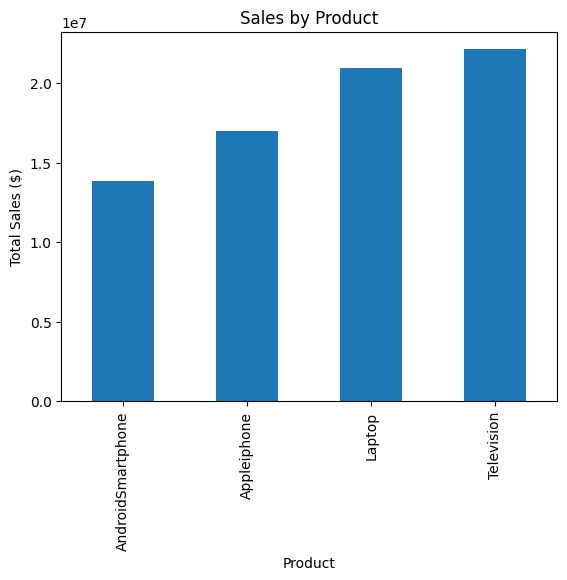

In [37]:
# Import pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'Product' and sum the 'Sales' column
product_sales = df.groupby('Product')['Sales'].sum()


# Plot the sales data for each product

product_sales.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.title('Sales by Product')
plt.show()

Create a histogram showing the distribution of sales by unit price

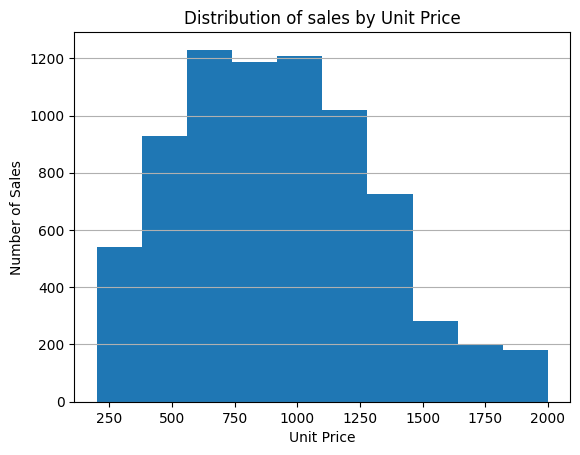

In [40]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Plot a histogram for the 'UnitPrice' column
plt.hist(df['UnitPrice'])
plt.xlabel('Unit Price')
plt.ylabel('Number of Sales')
plt.title('Distribution of sales by Unit Price')
plt.grid(axis='y')
plt.show()